In [1]:
import pandas as pd
import numpy as np

In [2]:
path=r"/Users/gunnvantsaini/OneDrive/project_codes/content/dl_basics/sony/data/regression.csv"

In [3]:
reg=pd.read_csv(path)

In [4]:
reg.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0


In [5]:
y=reg['mpg'].values

In [6]:
X=reg[['cylinders']].copy()

In [7]:
X['intercept']=1

In [8]:
X=X[['intercept','cylinders']]

In [9]:
X=X.values

In [10]:
x_t=X.T

In [11]:
A=np.linalg.inv((np.matmul(x_t,X)))

In [12]:
B=np.matmul(x_t,y)

In [13]:
A

array([[ 0.02841569, -0.00474871],
       [-0.00474871,  0.00087056]])

In [14]:
B

array([ 9358.8, 46957.5])

In [15]:
np.matmul(A,B)

array([42.9493135 , -3.56288658])

In [16]:
reg.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0


In [17]:
p=['cylinders','displacement']

In [18]:
reg[p].head(2)

,cylinders,displacement
0,8.0,307.0
1,8.0,350.0


In [19]:
class HelloWorld():
    def __init__(self,message):
        self.message=message
    def display(self):
        print(self.message)

In [20]:
m=HelloWorld(message="Hi!")

In [21]:
m.message

'Hi!'

In [22]:
m.display()

Hi!


In [23]:
formula="target+cylinders+displacement"

In [24]:
split_result=formula.split("+")

In [25]:
split_result

['target', 'cylinders', 'displacement']

In [26]:
split_result[0]

'target'

In [27]:
split_result[1:]

['cylinders', 'displacement']

In [28]:
formula="mpg~cylinders+displacement"

In [29]:
p=formula.split("~")[1].split("+")

In [30]:
['intercept']+p

['intercept', 'cylinders', 'displacement']

In [31]:
class OLS():
    def __init__(self,formula,data):
        self.formula=formula
        self.data=data
        self.y_name=formula.split("~")[0]
        self.pred_names=formula.split("~")[1].split("+")
    def fit(self):
        X=self.data[self.pred_names].copy()
        X['intercept']=1
        X=X[['intercept']+self.pred_names].values
        y=self.data[self.y_name].values
        x_t=X.T
        A=np.matmul(x_t,X)
        A=np.linalg.inv(A)
        B=np.matmul(x_t,y)
        betas=np.matmul(A,B)
        return betas

In [32]:
m=OLS("mpg~cylinders+weight",reg)

In [33]:
m.fit()

array([ 4.63937024e+01, -7.02508051e-01, -6.41225055e-03])

In [34]:
## mpg=4.63937024e+01-7.02508051e-01*cyl-6.41225055e-03*wt
W=np.array([ 4.63937024e+01, -7.02508051e-01, -6.41225055e-03])

In [35]:
W

array([ 4.63937024e+01, -7.02508051e-01, -6.41225055e-03])

In [36]:
X=reg[['cylinders','weight']].copy()
X['intercept']=1
X=X[['intercept','cylinders','weight']].values

In [37]:
y_pred=np.matmul(X,W)

In [38]:
y=reg['mpg'].values

In [39]:
ssq=(y-y_pred)**2

In [40]:
ssq.sum()

7363.048121788133

$2X^2-8X$

In [41]:
def grad(x):
    return 4*x-8

In [42]:
x=1
lr=0.01
for i in range(1000):
    x_new=x-lr*grad(x)
    x=x_new
    print(f"X: {x}, iter: {i+1}")

X: 1.04, iter: 1
X: 1.0784, iter: 2
X: 1.115264, iter: 3
X: 1.1506534400000001, iter: 4
X: 1.1846273024, iter: 5
X: 1.217242210304, iter: 6
X: 1.2485525218918399, iter: 7
X: 1.2786104210161662, iter: 8
X: 1.3074660041755195, iter: 9
X: 1.3351673640084987, iter: 10
X: 1.3617606694481588, iter: 11
X: 1.3872902426702325, iter: 12
X: 1.4117986329634231, iter: 13
X: 1.4353266876448862, iter: 14
X: 1.4579136201390908, iter: 15
X: 1.479597075333527, iter: 16
X: 1.500413192320186, iter: 17
X: 1.5203966646273785, iter: 18
X: 1.5395807980422833, iter: 19
X: 1.557997566120592, iter: 20
X: 1.5756776634757683, iter: 21
X: 1.5926505569367375, iter: 22
X: 1.6089445346592681, iter: 23
X: 1.6245867532728975, iter: 24
X: 1.6396032831419816, iter: 25
X: 1.6540191518163023, iter: 26
X: 1.6678583857436502, iter: 27
X: 1.6811440503139041, iter: 28
X: 1.693898288301348, iter: 29
X: 1.7061423567692942, iter: 30
X: 1.7178966624985224, iter: 31
X: 1.7291807959985814, iter: 32
X: 1.7400135641586383, iter: 33
X: 

In [43]:
### Cost=(w-0)^2+(w-0.2)^2+(w-0.4)^2+(w-0.9)^2+(w-1)^2
### Grad=2w+2(w-0.2)+2(w-0.4)+2(w-0.9)+2(w-1)
### Grad=10W-0.4-0.8-1.8-2
### Grad=10W-5
def grad(w):
    return 10*w-5

In [44]:
w=0.1
lr=0.001
for i in range(1000):
    w_new=w-lr*grad(w)
    w=w_new
    print(f"Iter: {i+1}, W: {w}")

Iter: 1, W: 0.10400000000000001
Iter: 2, W: 0.10796000000000001
Iter: 3, W: 0.11188040000000002
Iter: 4, W: 0.11576159600000002
Iter: 5, W: 0.11960398004000002
Iter: 6, W: 0.12340794023960001
Iter: 7, W: 0.127173860837204
Iter: 8, W: 0.13090212222883196
Iter: 9, W: 0.13459310100654365
Iter: 10, W: 0.1382471699964782
Iter: 11, W: 0.14186469829651344
Iter: 12, W: 0.1454460513135483
Iter: 13, W: 0.1489915908004128
Iter: 14, W: 0.15250167489240868
Iter: 15, W: 0.1559766581434846
Iter: 16, W: 0.15941689156204975
Iter: 17, W: 0.16282272264642925
Iter: 18, W: 0.16619449541996495
Iter: 19, W: 0.1695325504657653
Iter: 20, W: 0.17283722496110765
Iter: 21, W: 0.17610885271149657
Iter: 22, W: 0.17934776418438161
Iter: 23, W: 0.1825542865425378
Iter: 24, W: 0.18572874367711242
Iter: 25, W: 0.1888714562403413
Iter: 26, W: 0.19198274167793788
Iter: 27, W: 0.19506291426115852
Iter: 28, W: 0.19811228511854692
Iter: 29, W: 0.20113116226736144
Iter: 30, W: 0.20411985064468782
Iter: 31, W: 0.2070786521382

$x^2+y^2+8x+4y$

In [45]:
def grad_x(x):
    return 2*x+8
def grad_y(y):
    return 2*y+4

In [46]:
x=-1 ##Guess
y=-3 ##Guess
lr=0.001
for i in range(10):
    x_new=x-lr*grad_x(x)
    y_new=y-lr*grad_y(y)
    x=x_new
    y=y_new
    print(f"Iter {i+1}, X: {x}, Y: {y}")

Iter 1, X: -1.006, Y: -2.998
Iter 2, X: -1.011988, Y: -2.996004
Iter 3, X: -1.017964024, Y: -2.994011992
Iter 4, X: -1.023928095952, Y: -2.992023968016
Iter 5, X: -1.0298802397600961, Y: -2.990039920079968
Iter 6, X: -1.0358204792805759, Y: -2.988059840239808
Iter 7, X: -1.0417488383220148, Y: -2.9860837205593285
Iter 8, X: -1.0476653406453709, Y: -2.98411155311821
Iter 9, X: -1.0535700099640801, Y: -2.9821433300119735
Iter 10, X: -1.059462869944152, Y: -2.9801790433519497


In [47]:
reg.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0


In [48]:
b0=2
b1=1

In [49]:
X=reg['cylinders'].values

In [50]:
y_pred=X*b1+b0

In [51]:
y=reg['mpg'].values

In [ ]:
-2*sum(y-y_pred)/len(y)

In [52]:
(-2*(X*(y-y_pred)).sum())/len(y)

-148.86683417085428

In [53]:
b0=1
b1=1
lr=0.01
for i in range(10):
    y_pred=X*b1+b0
    grad_b0=(-2*(y-y_pred).sum())/len(y)
    grad_b1=(-2*((y-y_pred)*X).sum())/len(y)
    b0_new=b0-lr*grad_b0
    b1_new=b1-lr*grad_b1
    b0=b0_new
    b1=b1_new
    print(f"Iter: {i+1}, b0: {round(b0,3)}, b1: {round(b1,3)}")

Iter: 1, b0: 1.341, b1: 2.598
Iter: 2, b0: 1.501, b1: 3.115
Iter: 3, b0: 1.602, b1: 3.277
Iter: 4, b0: 1.682, b1: 3.323
Iter: 5, b0: 1.757, b1: 3.33
Iter: 6, b0: 1.828, b1: 3.324
Iter: 7, b0: 1.899, b1: 3.314
Iter: 8, b0: 1.97, b1: 3.303
Iter: 9, b0: 2.041, b1: 3.292
Iter: 10, b0: 2.111, b1: 3.28


$-2X^T(y-y\hat)/n$

In [54]:
X=reg[['cylinders']].copy()

In [55]:
X['intercept']=1
X=X[['intercept','cylinders']].values
y=reg['mpg'].values

In [56]:
W=np.ones(2)

In [57]:
y_pred=np.matmul(X,W)

In [59]:
W=np.ones(2)
lr=0.01
for i in range(1000):
    y_pred=np.matmul(X,W)
    resid=y-y_pred
    grad=np.matmul(X.T,resid)
    grad=(-2*grad)/len(y)
    W_new=W-lr*grad
    W=W_new
    print(f"Iter: {i+1}, W: {W}")

Iter: 1, W: [1.34119598 2.59776382]
Iter: 2, W: [1.50125923 3.115262  ]
Iter: 3, W: [1.60166451 3.27746791]
Iter: 4, W: [1.68236575 3.32282975]
Iter: 5, W: [1.7565042  3.32977461]
Iter: 6, W: [1.82840222 3.3240976 ]
Iter: 7, W: [1.89948162 3.31428287]
Iter: 8, W: [1.97021017 3.30312089]
Iter: 9, W: [2.04074187 3.29152945]
Iter: 10, W: [2.11112752 3.27981037]
Iter: 11, W: [2.18138395 3.26806291]
Iter: 12, W: [2.25151684 3.2563197 ]
Iter: 13, W: [2.32152821 3.24459145]
Iter: 14, W: [2.39141885 3.23288164]
Iter: 15, W: [2.46118916 3.2211914 ]
Iter: 16, W: [2.53083943 3.20952109]
Iter: 17, W: [2.60036986 3.1978708 ]
Iter: 18, W: [2.66978068 3.18624052]
Iter: 19, W: [2.73907209 3.17463025]
Iter: 20, W: [2.8082443  3.16303994]
Iter: 21, W: [2.87729752 3.15146958]
Iter: 22, W: [2.94623195 3.13991911]
Iter: 23, W: [3.01504779 3.12838852]
Iter: 24, W: [3.08374526 3.11687777]
Iter: 25, W: [3.15232454 3.10538681]
Iter: 26, W: [3.22078585 3.09391562]
Iter: 27, W: [3.28912939 3.08246417]
Iter: 28, 

Iter: 753, W: [31.58633059 -1.6589366 ]
Iter: 754, W: [31.60587791 -1.66221189]
Iter: 755, W: [31.62539161 -1.66548155]
Iter: 756, W: [31.64487174 -1.66874559]
Iter: 757, W: [31.66431836 -1.67200401]
Iter: 758, W: [31.68373153 -1.67525683]
Iter: 759, W: [31.7031113  -1.67850405]
Iter: 760, W: [31.72245773 -1.68174568]
Iter: 761, W: [31.74177088 -1.68498174]
Iter: 762, W: [31.76105081 -1.68821223]
Iter: 763, W: [31.78029757 -1.69143717]
Iter: 764, W: [31.79951122 -1.69465655]
Iter: 765, W: [31.81869182 -1.6978704 ]
Iter: 766, W: [31.83783942 -1.70107872]
Iter: 767, W: [31.85695409 -1.70428152]
Iter: 768, W: [31.87603587 -1.70747881]
Iter: 769, W: [31.89508482 -1.7106706 ]
Iter: 770, W: [31.91410101 -1.7138569 ]
Iter: 771, W: [31.93308448 -1.71703772]
Iter: 772, W: [31.9520353  -1.72021307]
Iter: 773, W: [31.97095352 -1.72338295]
Iter: 774, W: [31.98983919 -1.72654738]
Iter: 775, W: [32.00869238 -1.72970637]
Iter: 776, W: [32.02751313 -1.73285992]
Iter: 777, W: [32.0463015  -1.73600805]


In [60]:
#### Classification Problem

In [61]:
path=r"/Users/gunnvantsaini/OneDrive/project_codes/content/dl_basics/sony/data/classification.csv"
cls=pd.read_csv(path)

In [62]:
cls.head(2)

,No_pregnant,Plasma_glucose,Blood_pres,Skin_thick,Serum_insu,BMI,Diabetes_func,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


$log(p)/log(1-p)=\beta_0+\beta_1NoPreg$

In [63]:
W=np.ones(2)

In [64]:
W

array([1., 1.])

In [65]:
X=cls[['No_pregnant']].copy()
X['intercept']=1
X=X[['intercept','No_pregnant']].values
y=cls['Class'].values

In [66]:
W

array([1., 1.])

In [67]:
z=np.matmul(X,W) ## b0+b1X1

In [68]:
p=1/(1+np.exp(-z))

In [69]:
p-y

array([-9.11051194e-04,  8.80797078e-01, -1.23394576e-04,  8.80797078e-01,
       -2.68941421e-01,  9.97527377e-01, -1.79862100e-02,  9.99983299e-01,
       -4.74258732e-02, -1.23394576e-04,  9.93307149e-01, -1.67014218e-05,
        9.99983299e-01, -1.19202922e-01, -2.47262316e-03, -3.35350130e-04,
       -2.68941421e-01, -3.35350130e-04,  8.80797078e-01, -1.19202922e-01,
        9.82013790e-01,  9.99876605e-01, -3.35350130e-04, -4.53978687e-05,
       -6.14417460e-06, -1.67014218e-05, -3.35350130e-04,  8.80797078e-01,
        9.99999168e-01,  9.97527377e-01,  9.97527377e-01, -1.79862100e-02,
        9.82013790e-01,  9.99088949e-01,  9.99983299e-01,  9.93307149e-01,
        9.99993856e-01, -4.53978687e-05, -4.74258732e-02, -6.69285092e-03,
        9.82013790e-01,  9.99664650e-01,  9.99664650e-01, -4.53978687e-05,
        9.99664650e-01, -2.68941421e-01,  8.80797078e-01,  9.52574127e-01,
       -3.35350130e-04,  9.99664650e-01,  8.80797078e-01,  8.80797078e-01,
        9.97527377e-01, -

In [70]:
(-1*(y*np.log(p+0.000001)+(1-y)*np.log(1-p))).sum()

2207.9376656657996

In [71]:
def grad(X,resid):
    return np.matmul(X.T,resid)

In [72]:
def bce(y,p):
    delta=0.0000001
    loss=(-1*(y*np.log(p+delta)+(1-y)*np.log(1-p+delta))).sum()
    return loss

In [73]:
lr=0.01
W=np.ones(2)
for i in range(1000):
    z=np.matmul(X,W)
    p=1/(1+np.exp(-z))
    resid=p-y
    g=grad(X,resid)
    g=g/len(y)
    W_new=W-lr*g
    W=W_new
    l=bce(y,p)
    print(f"Iter: {i+1}, W: {W}, Loss: {round(l,3)}")

Iter: 1, W: [0.99417763 0.9789566 ], Loss: 2206.958
Iter: 2, W: [0.98836702 0.957932  ], Loss: 2170.582
Iter: 3, W: [0.98256858 0.93692726], Loss: 2134.229
Iter: 4, W: [0.97678274 0.91594351], Loss: 2097.915
Iter: 5, W: [0.97100993 0.89498199], Loss: 2061.651
Iter: 6, W: [0.96525064 0.87404403], Loss: 2025.449
Iter: 7, W: [0.95950535 0.85313104], Loss: 1989.317
Iter: 8, W: [0.95377459 0.83224456], Loss: 1953.265
Iter: 9, W: [0.94805891 0.81138626], Loss: 1917.302
Iter: 10, W: [0.9423589  0.79055793], Loss: 1881.435
Iter: 11, W: [0.93667516 0.76976151], Loss: 1845.674
Iter: 12, W: [0.93100835 0.74899913], Loss: 1810.025
Iter: 13, W: [0.92535915 0.72827308], Loss: 1774.498
Iter: 14, W: [0.91972831 0.70758584], Loss: 1739.101
Iter: 15, W: [0.91411659 0.68694013], Loss: 1703.843
Iter: 16, W: [0.90852481 0.66633893], Loss: 1668.735
Iter: 17, W: [0.90295385 0.64578546], Loss: 1633.785
Iter: 18, W: [0.89740465 0.62528326], Loss: 1599.006
Iter: 19, W: [0.8918782  0.60483621], Loss: 1564.41
Ite

Iter: 276, W: [ 0.33079259 -0.08772642], Loss: 564.039
Iter: 277, W: [ 0.32929359 -0.08749684], Loss: 563.863
Iter: 278, W: [ 0.32779613 -0.08726751], Loss: 563.686
Iter: 279, W: [ 0.32630022 -0.08703844], Loss: 563.51
Iter: 280, W: [ 0.32480585 -0.08680961], Loss: 563.334
Iter: 281, W: [ 0.32331302 -0.08658104], Loss: 563.159
Iter: 282, W: [ 0.32182173 -0.08635271], Loss: 562.984
Iter: 283, W: [ 0.32033198 -0.08612464], Loss: 562.809
Iter: 284, W: [ 0.31884377 -0.08589681], Loss: 562.635
Iter: 285, W: [ 0.31735709 -0.08566924], Loss: 562.461
Iter: 286, W: [ 0.31587194 -0.08544191], Loss: 562.287
Iter: 287, W: [ 0.31438833 -0.08521483], Loss: 562.114
Iter: 288, W: [ 0.31290625 -0.084988  ], Loss: 561.941
Iter: 289, W: [ 0.3114257  -0.08476142], Loss: 561.768
Iter: 290, W: [ 0.30994668 -0.08453509], Loss: 561.596
Iter: 291, W: [ 0.30846918 -0.084309  ], Loss: 561.424
Iter: 292, W: [ 0.30699321 -0.08408317], Loss: 561.253
Iter: 293, W: [ 0.30551877 -0.08385758], Loss: 561.081
Iter: 294, 

Iter: 542, W: [-0.01759555 -0.03475627], Loss: 527.897
Iter: 543, W: [-0.01873016 -0.03458498], Loss: 527.796
Iter: 544, W: [-0.01986358 -0.03441388], Loss: 527.695
Iter: 545, W: [-0.02099581 -0.03424297], Loss: 527.594
Iter: 546, W: [-0.02212684 -0.03407225], Loss: 527.493
Iter: 547, W: [-0.02325667 -0.03390172], Loss: 527.393
Iter: 548, W: [-0.02438532 -0.03373137], Loss: 527.293
Iter: 549, W: [-0.02551278 -0.03356121], Loss: 527.193
Iter: 550, W: [-0.02663905 -0.03339123], Loss: 527.093
Iter: 551, W: [-0.02776413 -0.03322145], Loss: 526.993
Iter: 552, W: [-0.02888802 -0.03305185], Loss: 526.894
Iter: 553, W: [-0.03001073 -0.03288243], Loss: 526.795
Iter: 554, W: [-0.03113226 -0.0327132 ], Loss: 526.696
Iter: 555, W: [-0.0322526  -0.03254416], Loss: 526.597
Iter: 556, W: [-0.03337177 -0.0323753 ], Loss: 526.498
Iter: 557, W: [-0.03448975 -0.03220663], Loss: 526.4
Iter: 558, W: [-0.03560655 -0.03203814], Loss: 526.302
Iter: 559, W: [-0.03672218 -0.03186984], Loss: 526.204
Iter: 560, W

Iter: 781, W: [-0.25746138  0.00129337], Loss: 508.861
Iter: 782, W: [-0.25834391  0.00142543], Loss: 508.8
Iter: 783, W: [-0.25922552  0.00155735], Loss: 508.739
Iter: 784, W: [-0.26010621  0.00168913], Loss: 508.678
Iter: 785, W: [-0.26098598  0.00182077], Loss: 508.617
Iter: 786, W: [-0.26186483  0.00195227], Loss: 508.556
Iter: 787, W: [-0.26274276  0.00208363], Loss: 508.496
Iter: 788, W: [-0.26361978  0.00221484], Loss: 508.435
Iter: 789, W: [-0.26449588  0.00234592], Loss: 508.375
Iter: 790, W: [-0.26537107  0.00247685], Loss: 508.315
Iter: 791, W: [-0.26624535  0.00260765], Loss: 508.255
Iter: 792, W: [-0.26711871  0.0027383 ], Loss: 508.195
Iter: 793, W: [-0.26799116  0.00286882], Loss: 508.135
Iter: 794, W: [-0.2688627   0.00299919], Loss: 508.075
Iter: 795, W: [-0.26973334  0.00312942], Loss: 508.015
Iter: 796, W: [-0.27060306  0.00325952], Loss: 507.956
Iter: 797, W: [-0.27147188  0.00338947], Loss: 507.897
Iter: 798, W: [-0.27233979  0.00351929], Loss: 507.837
Iter: 799, W

In [74]:
#### Confusion Matrix
labels=[1,1,0,0]
pred_labels=[1,0,1,0]

In [75]:
def confusion_matrix(labels,pred_labels):
    k=len(set(labels))
    m=np.zeros((k,k))
    for i in range(len(labels)):
        m[labels[i],pred_labels[i]]+=1
    return m

In [76]:
confusion_matrix(labels,pred_labels)

array([[1., 1.],
       [1., 1.]])

In [77]:
labels=[1,1,1,1,1,0,0,0,0,0]
p=[0.90,0.70,0.20,0.6,0.1,0.45,0.55,0.30,0.20,0.80]

In [78]:
th=[0.25,0.50,0.60,0.70]

In [79]:
(np.array(p)>0.25).astype('int')

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1])

In [80]:
for i in th:
    pred_l=(np.array(p)>i).astype('int')
    print(f"For threshold {i}, confusion matrix is:")
    m=confusion_matrix(labels,pred_l)
    print(m)
    print("="*10)

For threshold 0.25, confusion matrix is:
[[1. 4.]
 [2. 3.]]
For threshold 0.5, confusion matrix is:
[[3. 2.]
 [2. 3.]]
For threshold 0.6, confusion matrix is:
[[4. 1.]
 [3. 2.]]
For threshold 0.7, confusion matrix is:
[[4. 1.]
 [4. 1.]]


In [81]:
th=np.arange(0,1,0.01)
TPR=[]
FPR=[]
for i in th:
    pred_l=(np.array(p)>i).astype('int')
    m=confusion_matrix(labels,pred_l)
    tpr=m[1,1]/(m[1,0]+m[1,1])
    fpr=m[0,1]/(m[0,0]+m[0,1])
    TPR.append(tpr)
    FPR.append(fpr)

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

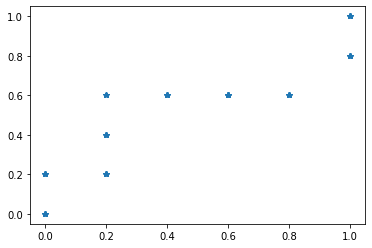

In [85]:
plt.plot(FPR,TPR,"*")